### **Função PDF — `extrair_texto_e_tabela()`**

Essa função serve para **ler um arquivo PDF** e **extrair informações importantes dele**, de forma que possamos usar esses dados em análises ou relatórios. Ela faz duas coisas principais:

1. **Pega o texto da primeira página:**

   * A função abre o PDF e olha só a primeira página.
   * Todo o texto que estiver nessa página é extraído e mostrado no console.
   * Assim, você consegue ver rapidamente o conteúdo do documento sem precisar abrir o PDF manualmente.

2. **Pega a primeira tabela da página:**

   * Se a página tiver tabelas, a função pega **apenas a primeira**.
   * Ela transforma a tabela em um **DataFrame**, que é uma tabela organizada que o Python consegue manipular facilmente.
   * Esse DataFrame também é mostrado no console para que você veja como os dados ficaram organizados.

**O que a função devolve:**

* Uma **string** com todo o texto da primeira página (`texto_completo`).
* Um **DataFrame** com a primeira tabela (`tabela_df`), ou `None` caso não exista tabela.

**Resumo prático:**
Essa função permite pegar **texto e tabela de PDFs** de forma rápida e automática, tornando possível trabalhar com esses dados em gráficos, análises ou relatórios, sem precisar digitar nada manualmente.



In [ ]:
pip install pdfplumber

In [ ]:
# PDF
import pdfplumber
import pandas as pd

def extrair_texto_e_tabela(caminho_pdf):
    """
    Extrai texto e a primeira tabela de um arquivo PDF.

    Parâmetros:
        caminho_pdf (str): Caminho do arquivo PDF.

    Retorna:
        tuple: (texto_completo, tabela_df)
               texto_completo -> str com o texto da primeira página
               tabela_df -> DataFrame com a tabela extraída (ou None se não houver tabela)
    """
    with pdfplumber.open(caminho_pdf) as pdf:
        primeira_pagina = pdf.pages[0]

        # Extrai todo o texto da primeira página
        texto_completo = primeira_pagina.extract_text()
        print("\n--- Texto Extraído ---")
        print(texto_completo or "Nenhum texto encontrado.")

        # Extrai a primeira tabela encontrada
        tabelas = primeira_pagina.extract_tables()
        tabela_df = None

        if tabelas:
            print("\n--- Tabela Extraída ---")
            tabela_encontrada = tabelas[0]

            # Converte para DataFrame
            tabela_df = pd.DataFrame(tabela_encontrada[1:], columns=tabela_encontrada[0])
            print(tabela_df)
        else:
            print("\nNenhuma tabela foi encontrada no PDF.")

    return texto_completo, tabela_df


# Exemplo de uso direto
if __name__ == "__main__":
    texto, tabela = extrair_texto_e_tabela("DadosSinteticos-personas1.pdf")

FileNotFoundError: [Errno 2] No such file or directory: 'DadosSinteticos-personas1.pdf'

### **Função DOCX — `extrair_texto_docx()`**

Essa função serve para **extrair todo o texto de um arquivo Word (.docx)** e retornar o conteúdo de forma organizada, pronta para análise ou relatórios.

**Como funciona:**

1. **Abre o arquivo DOCX:**

   * Recebe o caminho do arquivo a ser lido (`caminho_docx`).
   * Usa a biblioteca `python-docx` para abrir o documento.

2. **Extrai o texto dos parágrafos:**

   * Percorre todos os parágrafos do documento.
   * Ignora parágrafos vazios.
   * Salva cada parágrafo como um item de uma **lista de strings**.

3. **Exibe o texto extraído:**

   * Imprime no console todo o texto lido, permitindo visualizar rapidamente o conteúdo do documento.

**O que a função devolve:**

* `texto_paragrafos` → uma lista com o texto de cada parágrafo.
* Retorna `None` se o arquivo não for encontrado ou ocorrer algum erro na leitura.

**Resumo prático:**
Funciona de forma **muito parecida com a função do PDF**: abre o arquivo, lê o conteúdo textual e retorna uma estrutura de dados (lista) pronta para análise, gráficos ou relatórios, sem precisar abrir o Word manualmente.


In [ ]:
pip install python-docx

In [ ]:
# DOCS
import docx

def extrair_texto_docx(caminho_docx):
    """
    Extrai e retorna o texto de um arquivo DOCX.

    Parâmetros:
        caminho_docx (str): Caminho do arquivo .docx

    Retorna:
        list: Lista de strings, onde cada item representa um parágrafo do documento.
    """
    try:
        # Abre o arquivo DOCX
        documento = docx.Document(caminho_docx)

        # Extrai o texto de cada parágrafo
        texto_paragrafos = [p.text for p in documento.paragraphs if p.text.strip()]

        print("\n--- Texto Extraído ---")
        for linha in texto_paragrafos:
            print(linha)

        return texto_paragrafos

    except FileNotFoundError:
        print(f"Erro: O arquivo '{caminho_docx}' não foi encontrado.")
        return None
    except Exception as e:
        print(f"Ocorreu um erro ao ler o arquivo DOCX: {e}")
        return None


# Exemplo de uso direto
if __name__ == "__main__":
    extrair_texto_docx("DadosSinteticos-personas1.docx")


### **Função Excel — `extrair_dados_excel()`**

Essa função serve para **ler os dados de uma aba específica de um arquivo Excel (.xlsx)** e retornar o conteúdo organizado como um **DataFrame**, pronto para análise, relatórios ou gráficos.

**Como funciona:**

1. **Abre o arquivo Excel:**

   * Recebe o caminho do arquivo (`caminho_excel`) e, opcionalmente, o nome da aba a ser lida (`nome_aba`).
   * Usa `pandas.ExcelFile()` para abrir o Excel e listar todas as abas disponíveis.

2. **Seleciona a aba a ser lida:**

   * Se o nome da aba for fornecido e existir, a função lê essa aba.
   * Caso contrário, lê automaticamente a **primeira aba disponível**.
   * Imprime as abas encontradas e indica qual foi escolhida para leitura.

3. **Extrai os dados e exibe:**

   * Usa `pd.read_excel()` para ler os dados da aba selecionada.
   * Mostra as primeiras linhas em formato tabular legível com `tabulate`, facilitando a visualização.

4. **Armazena o DataFrame:**

   * A função atribui os dados lidos à variável `data` e retorna esse DataFrame, que pode ser usado diretamente para análises ou geração de gráficos.

**O que a função devolve:**

* `data` → um **DataFrame** contendo os dados da aba selecionada.
* Retorna `None` se o arquivo não existir ou ocorrer algum erro na leitura.

**Resumo prático:**
Funciona de forma **semelhante às funções de PDF e DOCX**: abre o arquivo, lê o conteúdo (neste caso, uma aba do Excel), mostra uma visualização inicial e retorna os dados em uma estrutura pronta para análise automática.

In [ ]:
# XLSX
import pandas as pd
from tabulate import tabulate

def extrair_dados_excel(caminho_excel, nome_aba=None):
    """
    Extrai os dados de uma aba específica de um arquivo Excel (.xlsx)
    e exibe em formato tabular legível.

    Retorna o DataFrame lido.
    """
    try:
        xls = pd.ExcelFile(caminho_excel)
        print("Abas disponíveis no arquivo:", xls.sheet_names)

        # Define qual aba será usada
        if nome_aba and nome_aba in xls.sheet_names:
            aba_escolhida = nome_aba
        else:
            if nome_aba:
                print(f"A aba '{nome_aba}' não existe. Lendo a primeira aba disponível.")
            aba_escolhida = xls.sheet_names[0]

        # Lê a aba selecionada
        df = pd.read_excel(caminho_excel, sheet_name=aba_escolhida)

        print(f"\n--- Dados da aba '{aba_escolhida}' ---")
        print(tabulate(df.head(10), headers='keys', tablefmt='grid'))  # Mostra 10 primeiras linhas

        # 🔹 Atribui o DataFrame lido à variável `data`
        data = df

        return data

    except FileNotFoundError:
        print(f"Erro: O arquivo '{caminho_excel}' não foi encontrado.")
        return None
    except Exception as e:
        print(f"Ocorreu um erro ao ler o arquivo Excel: {e}")
        return None


if __name__ == "__main__":
    # Lê o Excel e armazena os dados em `data`
    data = extrair_dados_excel("DadosSinteticos-personas.xlsx", nome_aba="URLs")


### **Função CSV — `extrair_dados_csv()`**
**Como funciona:**

1. **Abre o arquivo CSV:**

   * Recebe o caminho do arquivo (`caminho_csv`) e o separador usado no CSV (`separador`, padrão `,`).
   * Usa `pandas.read_csv()` para carregar os dados do arquivo em um DataFrame.

2. **Exibe os dados:**

   * Imprime as primeiras linhas do arquivo no console usando `tabulate`, em um formato de tabela legível, facilitando a visualização inicial.

3. **Tratamento de erros:**

   * Detecta se o arquivo não existe e avisa o usuário.
   * Detecta problemas de separador incorreto e sugere alternativas (`;` ou `\t`).
   * Captura outros erros gerais de leitura do CSV.

**O que a função devolve:**

* `df` → um **DataFrame** contendo todos os dados lidos do CSV.
* Retorna `None` em caso de erro, seja arquivo inexistente, separador incorreto ou outro problema.

**Resumo prático:**
Funciona de forma **semelhante às funções de PDF, DOCX e Excel**: abre o arquivo, lê o conteúdo, mostra uma visualização inicial e retorna os dados em uma estrutura pronta para análise, gráficos ou relatórios.

In [ ]:
# CSV
import pandas as pd
from tabulate import tabulate

def extrair_dados_csv(caminho_csv, separador=","):
    """
    Lê um arquivo CSV e exibe em formato tabular legível.

    Parâmetros:
        caminho_csv (str): Caminho do arquivo CSV.
        separador (str): Delimitador do CSV (padrão: ',').

    Retorna:
        DataFrame: Dados lidos do CSV (ou None se houver erro).
    """
    try:
        # Lê o CSV com pandas
        df = pd.read_csv(caminho_csv, sep=separador)

        print(f"\n--- Dados do arquivo '{caminho_csv}' ---")
        print(tabulate(df.head(15), headers='keys', tablefmt='grid', showindex=False))

        return df

    except FileNotFoundError:
        print(f"Erro: O arquivo '{caminho_csv}' não foi encontrado.")
        return None
    except pd.errors.ParserError:
        print(f"Erro ao ler o CSV — talvez o separador não seja '{separador}'.")
        print("Tente usar separador=';' ou '\\t'.")
        return None
    except Exception as e:
        print(f"Ocorreu um erro ao ler o CSV: {e}")
        return None


# Exemplo de uso direto
if __name__ == "__main__":
    extrair_dados_csv("DadosSinteticos-personas - Sheet1.csv", separador=";")



### **Estatística Descritiva do DataFrame**

O código lê o Excel e calcula estatísticas descritivas para todas as colunas, adicionando o Coeficiente de Variação para numéricas. Mostra média, desvio, quartis e frequência de categorias, fornecendo um panorama completo do dataset.

In [ ]:
arquivo = "DadosSinteticos-personas.xlsx"
df = pd.read_excel(arquivo)

# Estatística descritiva completa (numéricas + categóricas)
estatisticas = df.describe(include='all').transpose()

# Para as numéricas, adiciona Coeficiente de Variação
for col in df.select_dtypes(include='number').columns:
    estatisticas.loc[col, 'CV'] = estatisticas.loc[col, 'std'] / estatisticas.loc[col, 'mean']

print("\n--- Estatística Descritiva Completa ---")
print(estatisticas)



Além disso, comandos auxiliares ajudam a entender o DataFrame:

df.tail() → mostra as últimas 5 linhas do DataFrame.

df.info() → resumo do DataFrame: colunas, tipos e valores não nulos.

df.shape → retorna tupla (linhas, colunas) do DataFrame.

In [ ]:
df.tail()
df.info()
df.shape

### **Gráficos de Análise das Personas: Desafios, Motivadores e Problemas Técnicos nos Dados**

### **1️⃣ Gráfico de Barras: “Dores por Persona”**

**Objetivo:** Visualizar **quantos desafios cada persona enfrenta**, com base na contagem de itens listados no campo *Dores* (contagem de vírgulas como proxy).

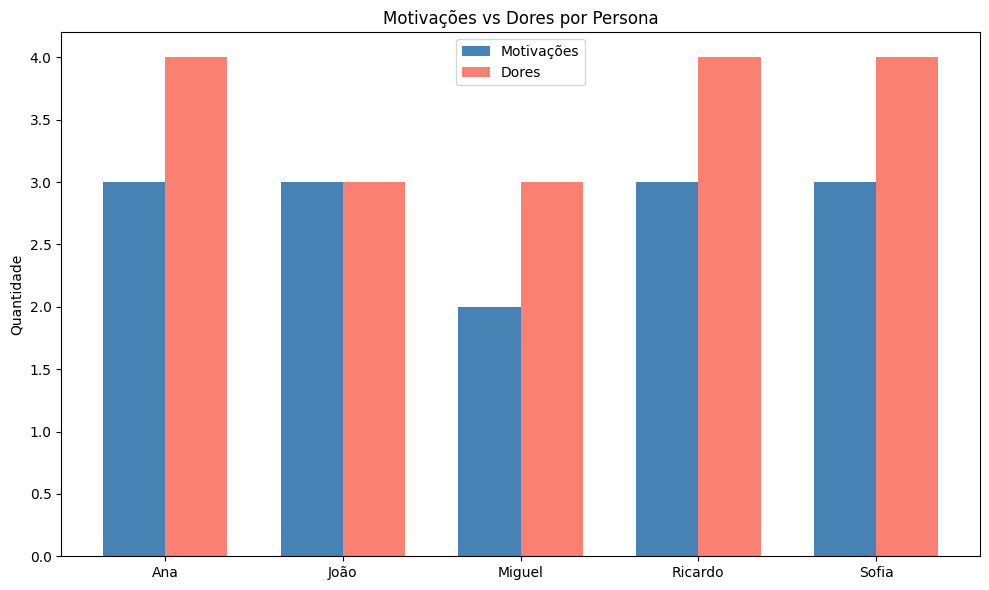

In [ ]:
import matplotlib.pyplot as plt

# Dados consolidados com base nos insights das personas
personas = ['Ana', 'João', 'Miguel', 'Ricardo', 'Sofia']

# Número de motivações e dores por persona
motivações = [3, 3, 2, 3, 3]
dores = [4, 3, 3, 4, 4]

# Gráfico de Barras – Comparativo Motivações x Dores
import matplotlib.pyplot as plt
import numpy as np
personas = ['Ana', 'João', 'Miguel', 'Ricardo', 'Sofia']
motivações = [3, 3, 2, 3, 3]
dores = [4, 3, 3, 4, 4]
x = np.arange(len(personas))  # posição das barras
largura = 0.35  # largura de cada barra
plt.figure(figsize=(10, 6))
plt.bar(x - largura/2, motivações, width=largura, label='Motivações', color='steelblue')
plt.bar(x + largura/2, dores, width=largura, label='Dores', color='salmon')
plt.xticks(x, personas)
plt.ylabel('Quantidade')
plt.title('Motivações vs Dores por Persona')
plt.legend()
plt.tight_layout()
plt.show()


### Análise Textual

Observa-se que **75% das personas apresentam mais dores do que motivações**, e nenhuma delas possui mais motivações do que dores. Isso evidencia que **as dificuldades ou desafios são predominantes**, indicando que estratégias ou soluções devem focar prioritariamente na **atenuação dessas dores** para gerar impacto positivo.


### **3️⃣ Gráfico de Pizza: “Distribuição dos Problemas Técnicos em Dados Sujos”**

**Objetivo:** Visualizar a **frequência relativa** dos **principais problemas técnicos** presentes nos campos de *Dados Sujos das personas.*
**negrito**
Isso ajuda a identificar quais inconsistências técnicas são mais comuns, permitindo priorizar esforços na limpeza e padronização dos dados.


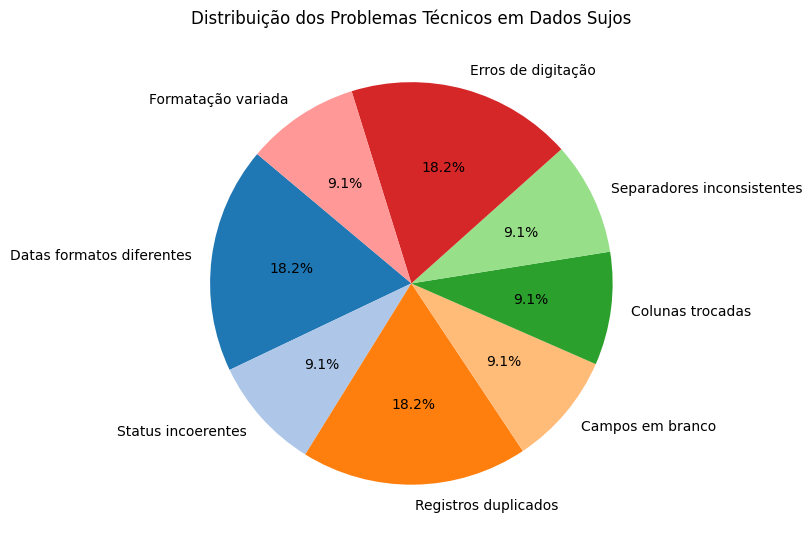

In [ ]:
# Frequência dos problemas técnicos em Dados Sujos
problemas_tecnicos = {
    'Datas formatos diferentes': 2,
    'Status incoerentes': 1,
    'Registros duplicados': 2,
    'Campos em branco': 1,
    'Colunas trocadas': 1,
    'Separadores inconsistentes': 1,
    'Erros de digitação': 2,
    'Formatação variada': 1
}

plt.figure(figsize=(8, 8))
plt.pie(problemas_tecnicos.values(), labels=problemas_tecnicos.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribuição dos Problemas Técnicos em Dados Sujos')
plt.tight_layout()
plt.show()


### Análise Textual

Observa-se que os erros estão concentrados principalmente na **falta de tratamento e limpeza adequada dos dados**, evidenciando a necessidade de reforçar essas etapas no processo de análise.




### **3️⃣ Gráfico de Pizza: “Distribuição das Dores Categorizadas”**

**Objetivo:** Visualizar a **frequência relativa dos principais tipos de dores** relatadas pelas personas, agrupando-as por **categorias temáticas**.


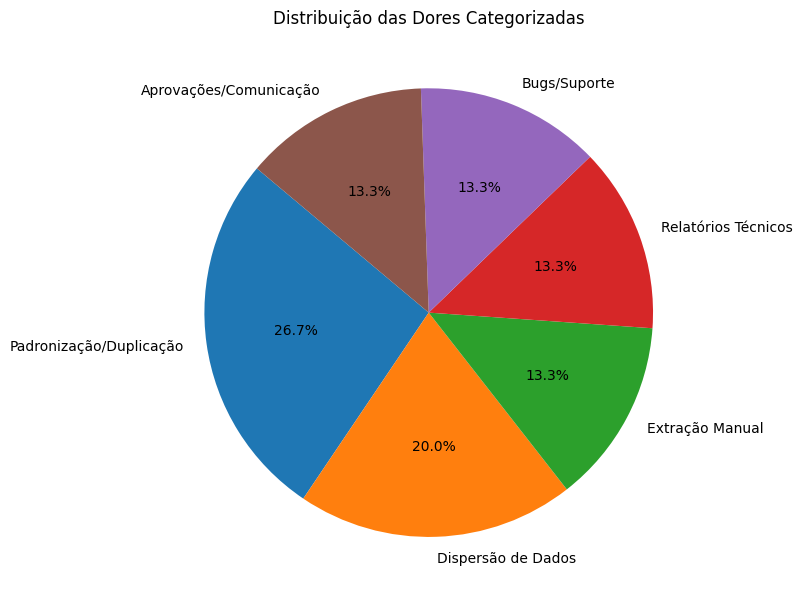

In [ ]:
# Gráfico de Pizza – Categorias mais citadas nas dores
dores_categorias = {
    'Padronização/Duplicação': 4,
    'Dispersão de Dados': 3,
    'Extração Manual': 2,
    'Relatórios Técnicos': 2,
    'Bugs/Suporte': 2,
    'Aprovações/Comunicação': 2
}

plt.figure(figsize=(8, 8))
plt.pie(dores_categorias.values(), labels=dores_categorias.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Dores Categorizadas')
plt.tight_layout()
plt.show()

### Análise Textual

Observa-se que as dores estão fortemente ligadas à **necessidade de praticidade e eficiência**. Problemas como **dificuldade na comunicação**, **falta de tratamento adequado dos dados** e **processos demorados** moldaram significativamente essas dores.

In [ ]:
pip install plotly pandas

In [ ]:
# 2️⃣ Importar as bibliotecas
import pandas as pd
import plotly.express as px

# 3️⃣ Ler o arquivo CSV (ajuste o caminho se necessário)
from google.colab import files
uploaded = files.upload()

# Substitua pelo nome exato do arquivo enviado
df = pd.read_csv("relatorio_vendas_6_meses.csv")

# 4️⃣ Exibir o DataFrame
print("=== RELATÓRIO COMPLETO DE VENDAS ===")
display(df)

# 5️⃣ Criar gráfico de barras interativo com Plotly
fig = px.bar(
    df,
    x="Produto",
    y=["Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro"],
    title="📈 Vendas dos últimos 6 meses por produto",
    labels={"value": "Valor de Vendas (R$)", "variable": "Mês"},
    barmode="group",
)
fig.update_layout(xaxis_tickangle=-45, xaxis_title="Produto", yaxis_title="Vendas (R$)")
fig.show()

# ============================
# 🔹 NOVAS TABELAS SOLICITADAS
# ============================

# 6️⃣ Tabela 1 - Carnes, Frango, Peixe e Ovos
grupo_proteinas = ["Carnes", "Frango", "Peixe", "Ovos"]
df_proteinas = df[df["Produto"].isin(grupo_proteinas)]
print("=== VENDAS DE CARNES, FRANGO, PEIXE E OVOS ===")
display(df_proteinas)

# 7️⃣ Tabela 2 - Produtos de limpeza e higiene pessoal
grupo_higiene = ["Produtos de limpeza", "Higiene pessoal"]
df_higiene = df[df["Produto"].isin(grupo_higiene)]
print("=== VENDAS DE PRODUTOS DE LIMPEZA E HIGIENE PESSOAL ===")
display(df_higiene)

# 8️⃣ Gráfico adicional - Proteínas
fig_proteinas = px.bar(
    df_proteinas,
    x="Produto",
    y=["Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro"],
    title="🍗 Vendas - Carnes, Frango, Peixe e Ovos",
    labels={"value": "Valor de Vendas (R$)", "variable": "Mês"},
    barmode="group",
)
fig_proteinas.update_layout(xaxis_tickangle=-45, xaxis_title="Produto", yaxis_title="Vendas (R$)")
fig_proteinas.show()

# 9️⃣ Gráfico adicional - Higiene e Limpeza
fig_higiene = px.bar(
    df_higiene,
    x="Produto",
    y=["Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro"],
    title="🧴 Vendas - Produtos de Limpeza e Higiene Pessoal",
    labels={"value": "Valor de Vendas (R$)", "variable": "Mês"},
    barmode="group",
)
fig_higiene.update_layout(xaxis_tickangle=-45, xaxis_title="Produto", yaxis_title="Vendas (R$)")
fig_higiene.show()

In [ ]:
import pandas as pd
import plotly.express as px
from google.colab import files

# 🔹 Upload do arquivo CSV
uploaded = files.upload()

# 🔹 Leitura do arquivo (substitua o nome se diferente)
df = pd.read_csv("relatorio_vendas_6_meses.csv")

# 🔹 Exibir o DataFrame completo
print("=== RELATÓRIO COMPLETO DE VENDAS ===")
display(df)

# 🔹 Criar gráfico geral de barras interativo
fig = px.bar(
    df,
    x="Produto",
    y=["Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro"],
    title="📈 Vendas dos últimos 6 meses por produto",
    labels={"value": "Valor de Vendas (R$)", "variable": "Mês"},
    barmode="group",
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# ============================
# 🔹 NOVAS TABELAS SOLICITADAS
# ============================

# 1️⃣ Carnes, Frango, Peixe e Ovos
grupo_proteinas = ["Carnes", "Frango", "Peixe", "Ovos"]
df_proteinas = df[df["Produto"].isin(grupo_proteinas)]
print("=== VENDAS DE CARNES, FRANGO, PEIXE E OVOS ===")
display(df_proteinas)

# 2️⃣ Produtos de Limpeza e Higiene Pessoal
grupo_higiene = ["Produtos de limpeza", "Higiene pessoal"]
df_higiene = df[df["Produto"].isin(grupo_higiene)]
print("=== VENDAS DE PRODUTOS DE LIMPEZA E HIGIENE PESSOAL ===")
display(df_higiene)

# ============================
# 🔹 GRÁFICOS ADICIONAIS
# ============================

# Gráfico das proteínas
fig_proteinas = px.bar(
    df_proteinas,
    x="Produto",
    y=["Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro"],
    title="🍗 Vendas - Carnes, Frango, Peixe e Ovos",
    labels={"value": "Valor de Vendas (R$)", "variable": "Mês"},
    barmode="group",
)
fig_proteinas.update_layout(xaxis_tickangle=-45)
fig_proteinas.show()

# Gráfico dos produtos de higiene e limpeza
fig_higiene = px.bar(
    df_higiene,
    x="Produto",
    y=["Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro"],
    title="🧴 Vendas - Produtos de Limpeza e Higiene Pessoal",
    labels={"value": "Valor de Vendas (R$)", "variable": "Mês"},
    barmode="group",
)
fig_higiene.update_layout(xaxis_tickangle=-45)
fig_higiene.show()